<a href="https://colab.research.google.com/github/dapopadev/project/blob/main/Intro%20a%20aprendizaje%20automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=b8bcf7fa68e5bef173c1d17ed0bf596e9a2861e94a221df80dac47729b68b191
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark






**2.INSTALAMOS EL MÓDULO PYSPARK**



3.**CREAMOS LA SESIÓN PYSPARK***

In [2]:
from pyspark.sql import SparkSession

In [3]:
from google.colab import drive

 4. **DISEÑAMOS UNA UNIDAD PERSONAL DE GOOGLE DRIVE**

In [4]:
drive.mount("/drive")

Mounted at /drive


In [5]:
spark=SparkSession.builder.appName("my_app").getOrCreate()

5.***CARGAMOS EL ARCHIVO STOCKS_2021***

In [6]:
df=spark.read.option("Header",True).csv("/drive/MyDrive/CSV_stocks_2021.csv")

 6.**REALIZAMOS UN FILTRO DE LOS DATOS QUE SE CORRESPONDEN CON EL VALOR 'HON' EN LA COLUMNA 'TICKER'**

In [7]:
df_hon=df.filter(df.ticker=='HON')

In [8]:
df_hon=df_hon.withColumnRenamed('open','open_hon')

 **7.CONVERTIMOS EL DATAFRAME SPARK A UNO PANDA PARA UTILIZAR PYTHON **

In [9]:
import pandas as pd

In [10]:
import numpy as np

**8.EXTRAEMOS LA COLUMNA 'OPEN' Y LA CONVERTIMOS EN UN ARRAY UNIDIMENSIONAL USANDO NUMPY**

In [11]:
pandas_hon_open=df_hon.toPandas()

In [12]:
hon_array=np.array(pandas_hon_open['open_hon']).ravel()

**9.DIVIDIMOS EL ARRAY EN 2 PARA COMPARAR 2 PERIODOS Y VER SI HAY CORRELACIÓN**

In [13]:
hon_array_split=np.array_split(hon_array,2)

In [14]:
hon_array_0=hon_array_split[0].astype(float)

In [15]:
hon_mean_0=np.mean(hon_array_0)

In [16]:
hon_array_1=hon_array_split[1].astype(float)

In [17]:
hon_mean_1=np.mean(hon_array_1)

In [18]:
df_hon=df_hon.withColumn('open_hon',df_hon.open_hon.cast('double'))

In [19]:
df_hon.stat.corr('open_hon','open_hon')

1.0

**10.MÓDULO DE PYTHON SCIKIT-LEARN PARA CALCULAR COEFICIENTE DE CORRELACIÓN**

In [20]:
from sklearn import linear_model

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
contador=[]

In [23]:
puntos=1000

In [24]:
for a in range (puntos):contador.append(a)

In [25]:
hon_array_0=np.delete(hon_array_0,0)

In [26]:
x_train=np.array(hon_array_0).reshape(-1,1)

In [27]:
y_train=np.array(hon_array_1).reshape(-1,1)

In [31]:
regr=linear_model.LinearRegression()

In [35]:
regr.fit(np.array(contador).reshape(-1,1),x_train)

ValueError: ignored

In [32]:
from matplotlib import pyplot as plt

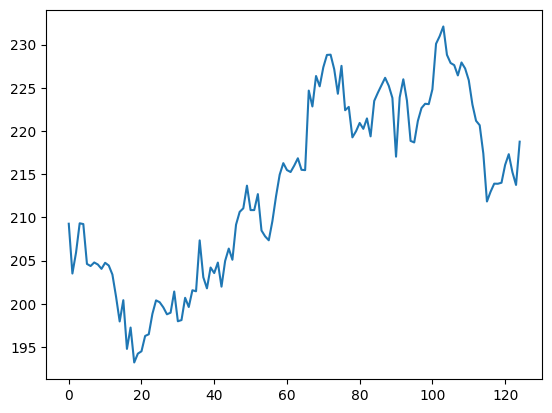

In [33]:
plt.plot(x_train)

In [34]:
plt.plot(np.array(prediction).reshape(-1,1),label='recta de regresión')


NameError: ignored